In [220]:
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib
import matplotlib.pyplot as plt

# Ex 3-2
## implement clgs

In [674]:
def clgs(A):
    
    [m,n] = np.shape(A)
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros((n,n))

    for j in range(n):

        for i in range(j-1):
    
            R[i,j] = np.dot(Q[:,i],A[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
        
    return Q, R

## implement mgs

In [675]:
def mgs(A):
    
    [m,n] = np.shape(A)
    Q = A.copy()
    R = np.zeros((n,n))
    
    for i in range(n-1):
        
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,(i+1):n] = np.dot(Q[:,i],Q[:,(i+1):n])
        
        for j in range(m):
            
            Q[j,(i+1):n] = Q[j,(i+1):n] - Q[j,i]*R[i,(i+1):n]
        
    R[(n-1),(n-1)] = np.linalg.norm(Q[:,(n-1)])
    Q[:,(n-1)] = Q[:,(n-1)]/R[(n-1),(n-1)]
    
    return Q, R

## implement qrhouse

In [676]:
def qrhouse(A):
    
    [m,n] = np.shape(A)
    R = A.copy()
    V = np.zeros((m,n))
    
    for k in range(min(m-1,n)):
        
        x = np.array(R[k:m,k])
        v = x + np.sign(x[0])*np.linalg.norm(x)*np.eye(1,len(x))
        V[k:m,k] = v
        R[k:m,k:n] = R[k:m,k:n] - np.outer(2*v,np.dot(v,R[k:m,k:n]))/np.dot(v,v.T)
        
    R = np.triu(R[0:n,0:n])
    
    return V, R

## implement formQ

In [677]:
def formQ(V):
    
    [m,n] = np.shape(V)
    Q = np.eye(m,n)
    
    for j in reversed(range(min(m-1,n))):
        
        v = V[:,j]
        Q = Q - np.outer(2*v,np.dot(v,Q))/np.dot(v,v.T)
    
    return Q

## 3.2 a) implement given code

In [678]:
[U, X] = sp.linalg.qr(np.random.randn(80,80))         # [U,X] = qr(randn(80))
[V, X] = sp.linalg.qr(np.random.randn(80,80))         # [V,X] = qr(randn(80))
J = [i for i in range(1,81)]                         # J = 1:80
S = np.diag([2**(-i) for i in J])                    # S = diag(2.^(-J))
A = np.matmul(U,S,V)                                  # A = U*S*V
[Qc, Rc] = clgs(A)
[Qm, Rm] = mgs(A)

### test

In [679]:
print("U\n",U,"\n" )
print("V\n",V,"\n" )
print("A\n",A,"\n" )

print("Qc\n",Qc,"\n" )
print("Rc\n",Rc,"\n" )

print("Qm\n",Qm,"\n" )
print("Rm\n",Rm,"\n" )

print("Qc-U\n",Qc-U,"\n" )
print("norm(Qc-U)\n", np.linalg.norm(Qc-U),"\n")

print("Qm-U\n",Qm-U,"\n" )
print("norm(Qm-U)\n", np.linalg.norm(Qc-U),"\n")

print("Qc*Rc\n",np.matmul(Qc,Rc),"\n" )
print("norm(A-Qc*Rc)\n", np.linalg.norm(A-np.matmul(Qc,Rc)),"\n")

print("Qm*Rm\n",np.matmul(Qm,Rm),"\n" )
print("norm(A-Qm*Rm)\n", np.linalg.norm(A-np.matmul(Qm,Rm)),"\n")


U
 [[-0.04435837 -0.07060143  0.08364741 ... -0.19666166  0.27397109
   0.22524843]
 [ 0.003907   -0.08191974 -0.06249435 ... -0.00956249  0.04695526
   0.07391057]
 [ 0.05538527  0.12576072 -0.13292039 ... -0.0579358  -0.03555538
   0.11309381]
 ...
 [-0.07278582 -0.02598153 -0.01330019 ... -0.17485947  0.17197083
  -0.18281623]
 [ 0.027768    0.00284022 -0.08179047 ... -0.11676497 -0.02345489
   0.0619428 ]
 [ 0.36328116 -0.19659008 -0.01398884 ... -0.07960646  0.00618523
   0.01150467]] 

V
 [[-2.21791839e-02 -1.76503571e-02  1.04559263e-02 ... -6.50698842e-25
   4.53247152e-25  1.86321135e-25]
 [ 1.95350031e-03 -2.04799346e-02 -7.81179357e-03 ... -3.16396135e-26
   7.76809695e-26  6.11373947e-26]
 [ 2.76926331e-02  3.14401795e-02 -1.66150485e-02 ... -1.91693471e-25
  -5.88214488e-26  9.35490047e-26]
 ...
 [-3.63929119e-02 -6.49538151e-03 -1.66252346e-03 ... -5.78561459e-25
   2.84501867e-25 -1.51222043e-25]
 [ 1.38839992e-02  7.10053960e-04 -1.02238087e-02 ... -3.86342887e-25
  -3.

### comparing clgs and mgs

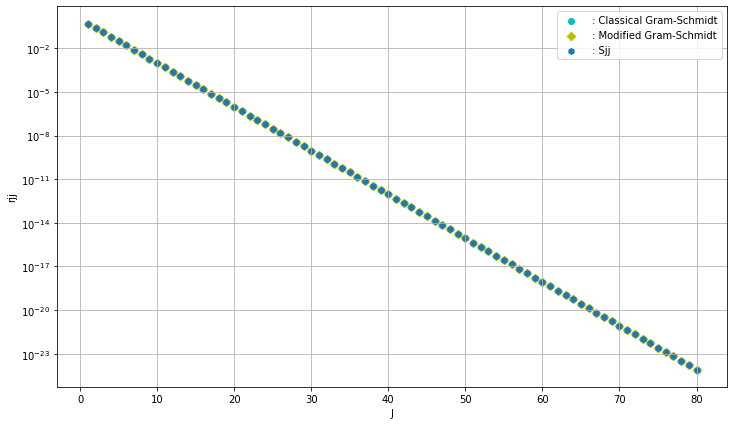

In [680]:
plt.figure(figsize=(12,7))
plt.scatter(J,np.diag(Rc),marker='o',label=' : Classical Gram-Schmidt',c='c')
plt.scatter(J,np.diag(Rm),marker='D',label=' : Modified Gram-Schmidt',c='y')
plt.scatter(J,np.diag(S),marker='h', label=' : Sjj')
plt.grid('True')
plt.yscale('log')
plt.xlabel('J')
plt.ylabel('rjj')
plt.legend()

## 3.2 b) comparing mgs and householder

In [681]:
A = np.array([[.70000,.70711],[.70001,.70711]])
[Qm,Rm] = mgs(A)

print('Qm\n',Qm,'\n')
print('Rm\n',Rm,'\n')

[V, R] = qrhouse(A)

print('V\n',V,'\n')
print('R\n',R,'\n')

Q = formQ(V)

print('Q\n',Q,'\n')

normhouse = np.linalg.norm(np.matmul(Q.T,Q)-np.eye(2,2))

print('norm(Q.T*Q-I)\n',normhouse,'\n')

normmgs = np.linalg.norm(np.matmul(Qm.T,Qm)-np.eye(2,2))

print('norm(Qm.T*Qm-I)\n',normmgs,'\n')

'householder가 더 stable한 결과를 보인다'

Qm
 [[ 0.70710173  0.70711183]
 [ 0.70711183 -0.70710173]] 

Rm
 [[9.89956565e-01 1.00000455e+00]
 [0.00000000e+00 7.14283864e-06]] 

V
 [[1.68995656 0.        ]
 [0.70001    0.        ]] 

R
 [[-9.89956565e-01 -1.00000455e+00]
 [ 0.00000000e+00 -7.14283864e-06]] 

Q
 [[-0.70710173 -0.70711183]
 [-0.70711183  0.70710173]] 

norm(Q.T*Q-I)
 3.451616545114987e-16 

norm(Qm.T*Qm-I)
 3.254726094493924e-11 



'householder가 더 stable한 결과를 보인다'

# Ex 3-3

In [682]:
def givens(A):
    
    [m,n] = np.shape(A)
    
    R = A.copy()
    Q = np.eye(m)
    
    for j in range(n):
            
        for i in reversed(range(j+1,m)):

            G = np.eye(m)
            theta = np.arctan(R[i,j]/R[j,j])
            G[j,j] = np.cos(theta)
            G[j,i] = np.sin(theta)
            G[i,j] = -np.sin(theta)
            G[i,i] = np.cos(theta)

            R = np.matmul(G,R)
            Q = np.matmul(Q,G.T)
            
    return Q, R

## test

In [683]:
A = np.random.randn(5,4)
[Qg,Rg] = givens(A)
[Q, R] = sp.linalg.qr(A)

print('Qg\n',Qg,'\n')
print('Q\n',Q,'\n')

print('Rg\n',Rg,'\n')
print('R\n',R,'\n')

print('A\n',A,'\n')
print('Qg*Rg\n',np.matmul(Qg,Rg),'\n')
print('Q*R\n',np.matmul(Q,R),'\n')



Qg
 [[ 0.53186188 -0.81467065 -0.16459687  0.06644175  0.14808118]
 [ 0.41704489  0.03271475  0.36728396 -0.37242286 -0.74256784]
 [ 0.57951409  0.38958144  0.41162299  0.50793104  0.29148293]
 [-0.35256646 -0.30003185  0.21871419  0.72209781 -0.46520601]
 [ 0.28819577  0.30569375 -0.78787117  0.27832987 -0.35395767]] 

Q
 [[-0.53186188  0.81467065  0.16459687 -0.06644175  0.14808118]
 [-0.41704489 -0.03271475 -0.36728396  0.37242286 -0.74256784]
 [-0.57951409 -0.38958144 -0.41162299 -0.50793104  0.29148293]
 [ 0.35256646  0.30003185 -0.21871419 -0.72209781 -0.46520601]
 [-0.28819577 -0.30569375  0.78787117 -0.27832987 -0.35395767]] 

Rg
 [[-1.60796731e+00  1.97536527e-01  3.77572207e-01 -1.05389141e+00]
 [-4.49474396e-17 -2.05768584e+00 -5.16108142e-01 -4.86070811e-02]
 [ 4.15888133e-17  5.63457586e-17  1.24750505e+00 -1.76625151e+00]
 [ 1.04494458e-16 -6.19930717e-17 -6.53517414e-17 -9.95962330e-01]
 [-3.38173345e-17 -6.08159295e-17  9.84463403e-18  5.38027558e-17]] 

R
 [[ 1.6079673

# Ex 4-3

## 4.3 a)

### eigvals of 100 random matrices

Text(0.5, 1.0, 'eigenvalues of 100 random matrices')

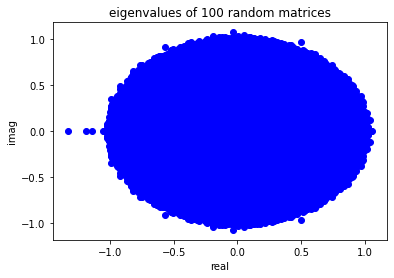

In [464]:
for i in range(100):
    m = np.random.randint(1,1000)
    A = np.random.randn(m,m)/np.sqrt(m)
    e = np.linalg.eigvals(A)
    plt.scatter(np.real(e),np.imag(e), c ='b')

plt.xlabel('real')
plt.ylabel('imag')
plt.title('eigenvalues of 100 random matrices')

### m = 8, 16, 32, 64, ...

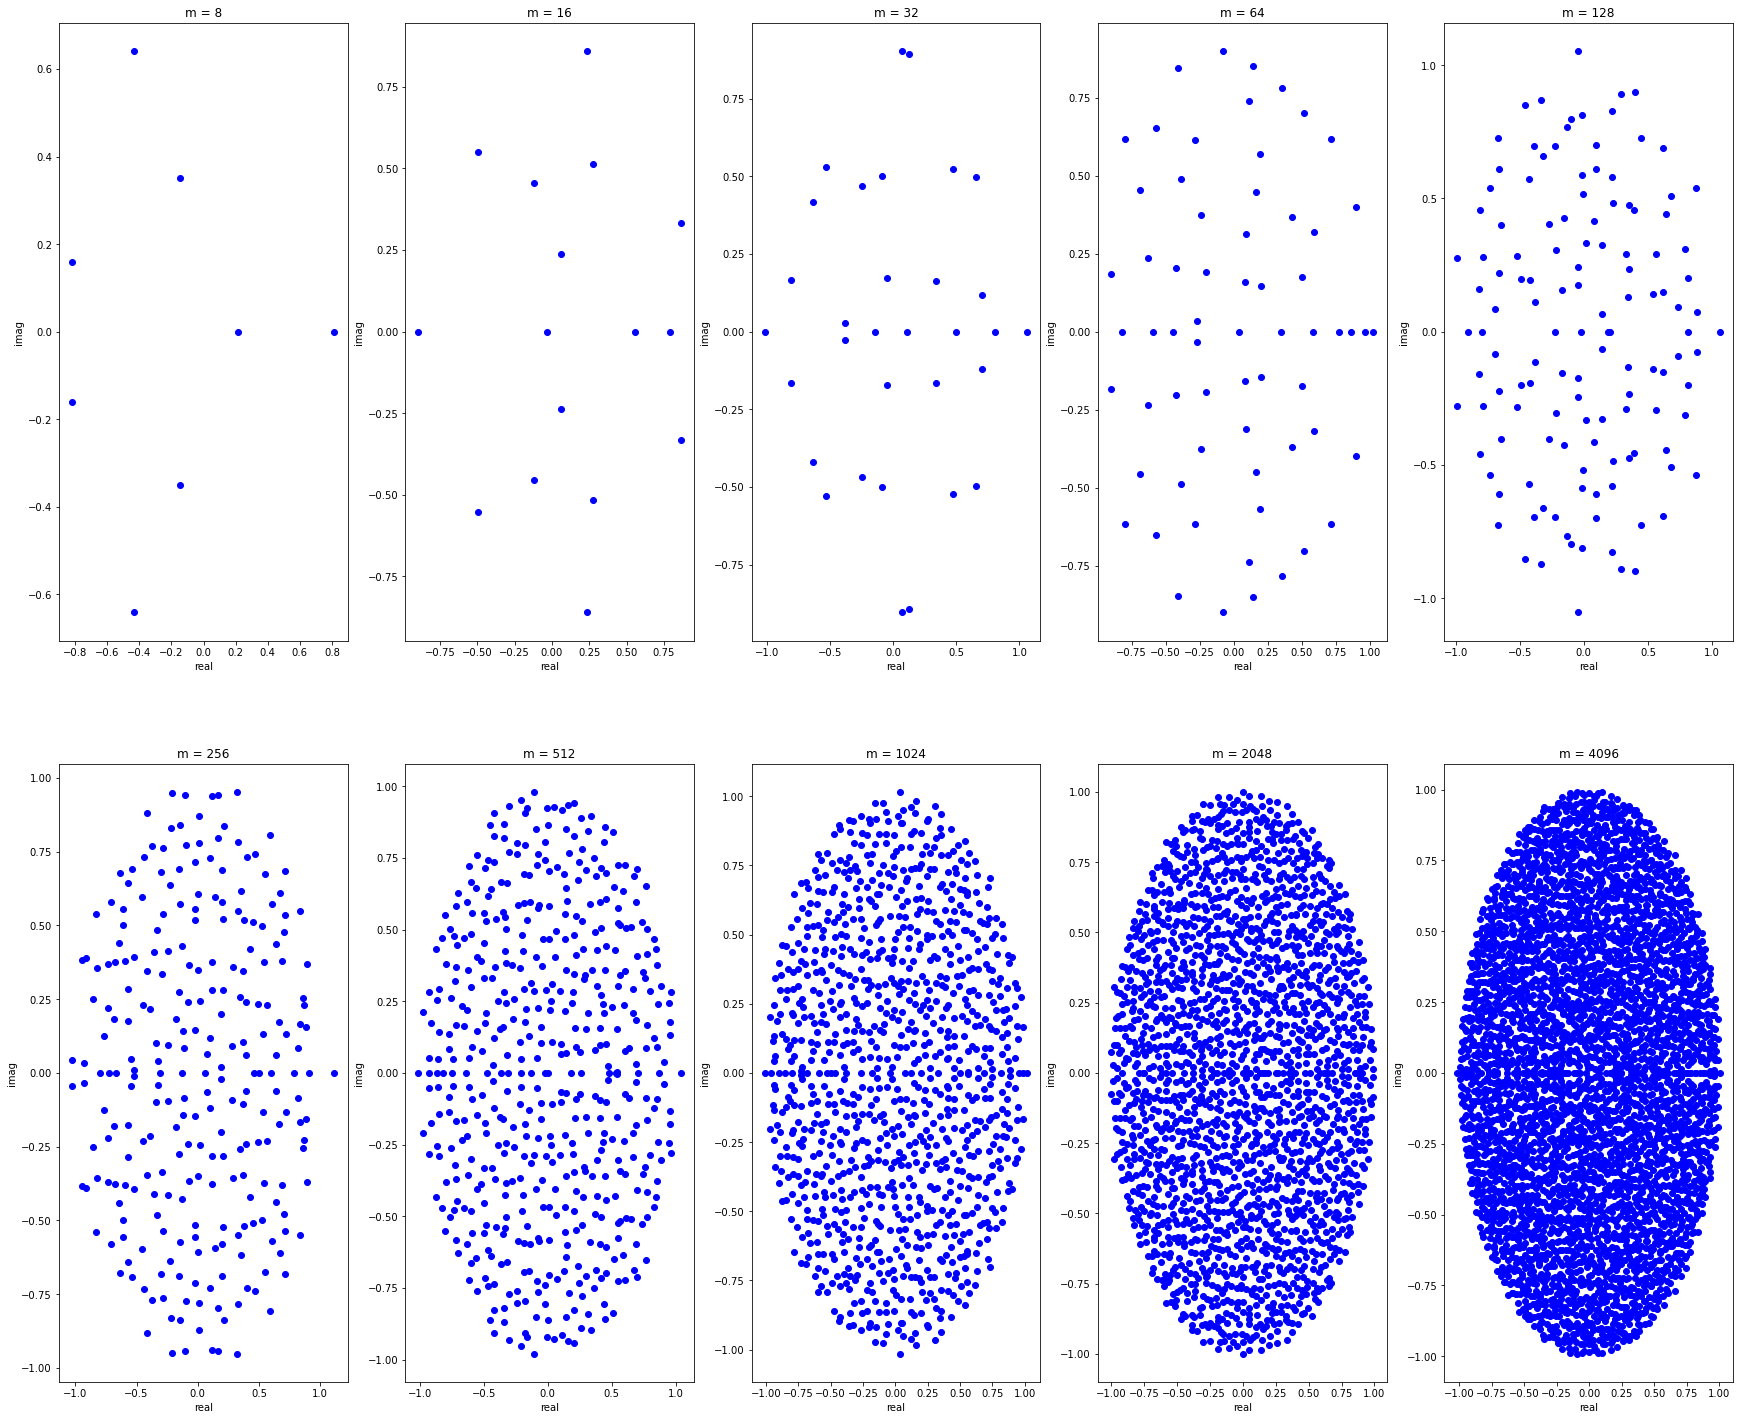

In [521]:
plt.figure(figsize=(30,25))

for i in range(10):
   
    plt.subplot(2,5,i+1)
    m = 2**(i+3)
    title = 'm = '+str(m)
    A = np.random.randn(m,m)/np.sqrt(m)
    e = np.linalg.eigvals(A)
    plt.scatter(np.real(e),np.imag(e), c ='b')
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.title(title)

### spectral radius

'spectral radius converges to 1'

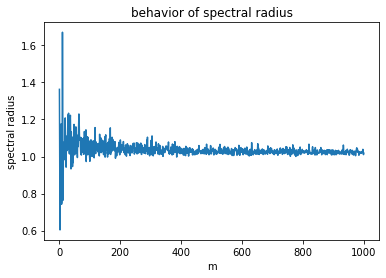

In [541]:
q = [0]*1000
    
for m in range(1,1001):
    A = np.random.randn(m,m)/np.sqrt(m)
    e = np.linalg.eigvals(A)
    q[m-1] = max(abs(e))
    
plt.plot([i for i in range(1,1001)],q)
plt.xlabel('m')
plt.ylabel('spectral radius')
plt.title('behavior of spectral radius')

"spectral radius converges to 1"

## 4-3 b)

### norm of random matrix

'inequality does not approach an equality'

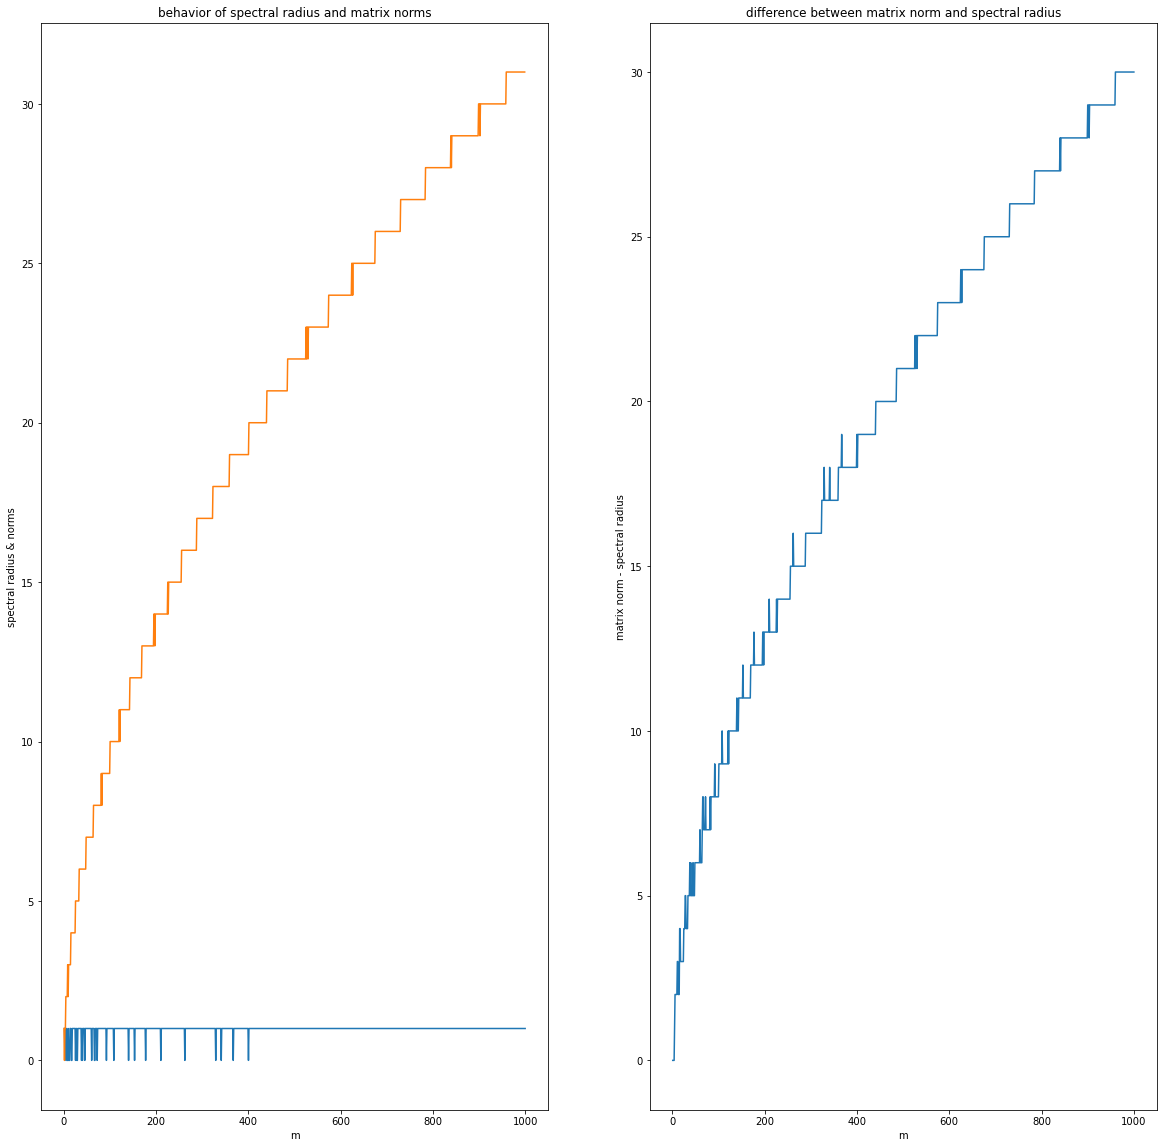

In [545]:
plt.figure(figsize=(20,20))
norms = np.array([0]*1000)
spectrals = np.array([0]*1000)
for m in range(1,1001):
    A = np.random.randn(m,m)/np.sqrt(m)
    e = np.linalg.eigvals(A)
    spectrals[m-1] = max(abs(e))
    norms[m-1] = np.linalg.norm(A)

plt.subplot(1,2,1)
plt.plot([i for i in range(1,1001)],spectrals,norms)
plt.xlabel('m')
plt.ylabel('spectral radius & norms')
plt.title('behavior of spectral radius and matrix norms')

plt.subplot(1,2,2)
plt.plot([i for i in range(1,1001)],norms-spectrals)
plt.xlabel('m')
plt.ylabel('matrix norm - spectral radius')
plt.title('difference between matrix norm and spectral radius')

'inequality does not approach an equality'

## 4-3 c)

### condition numbers & minimum singular values

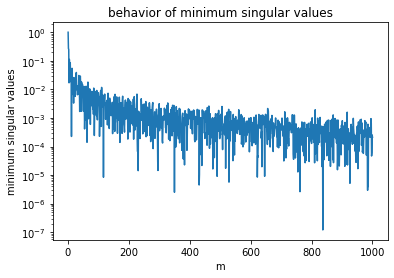

In [546]:
minsvs = [0]*1000
for m in range(1,1001):
    A = np.random.randn(m,m)/np.sqrt(m)
    minsvs[m-1] = 1/np.linalg.cond(A)
    
plt.plot([i for i in range(1,1001)],minsvs)
plt.xlabel('m')
plt.ylabel('minimum singular values')
plt.title('behavior of minimum singular values')
plt.yscale('log')

### probability distribution

(array([   2,   10,   24,   32,   55,  145,  234,  479,  959, 1760, 2853,
        2790,  650,    2,    0,    0,    0,    0,    0], dtype=int64),
 array([1.90734863e-06, 3.81469727e-06, 7.62939453e-06, 1.52587891e-05,
        3.05175781e-05, 6.10351562e-05, 1.22070312e-04, 2.44140625e-04,
        4.88281250e-04, 9.76562500e-04, 1.95312500e-03, 3.90625000e-03,
        7.81250000e-03, 1.56250000e-02, 3.12500000e-02, 6.25000000e-02,
        1.25000000e-01, 2.50000000e-01, 5.00000000e-01, 1.00000000e+00]))

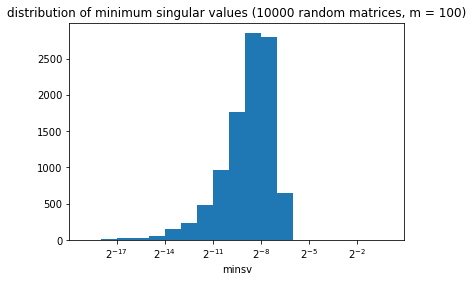

In [548]:
m = 100
minsvs = [0]*10000
b = [2**(-i) for i in reversed(range(20))]

for j in range(10000):
    A = np.random.randn(m,m)/np.sqrt(m)
    minsvs[j] = 1/np.linalg.cond(A)

plt.hist(minsvs,bins=b)
plt.xscale('log',basex=2)
plt.title('distribution of minimum singular values (10000 random matrices, m = 100)')
plt.xlabel('minsv')

np.histogram(minsvs,bins=b)



## 4-3 d) triangular matrix

### eigvals of 100 random upper triangular matrices

Text(0.5, 1.0, 'eigenvalues of 100 random upper triangular matrices')

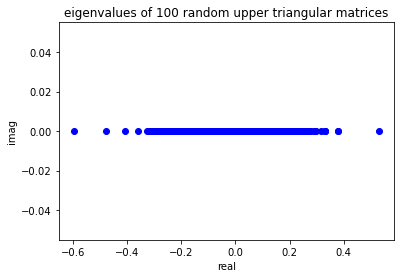

In [549]:
for i in range(100):
    m = np.random.randint(1,1000)
    A = np.triu(np.random.randn(m,m)/np.sqrt(m))
    e = np.linalg.eigvals(A)
    plt.scatter(np.real(e),np.imag(e), c ='b')

plt.xlabel('real')
plt.ylabel('imag')
plt.title('eigenvalues of 100 random upper triangular matrices')

### m = 8, 16, 32, 64, ...

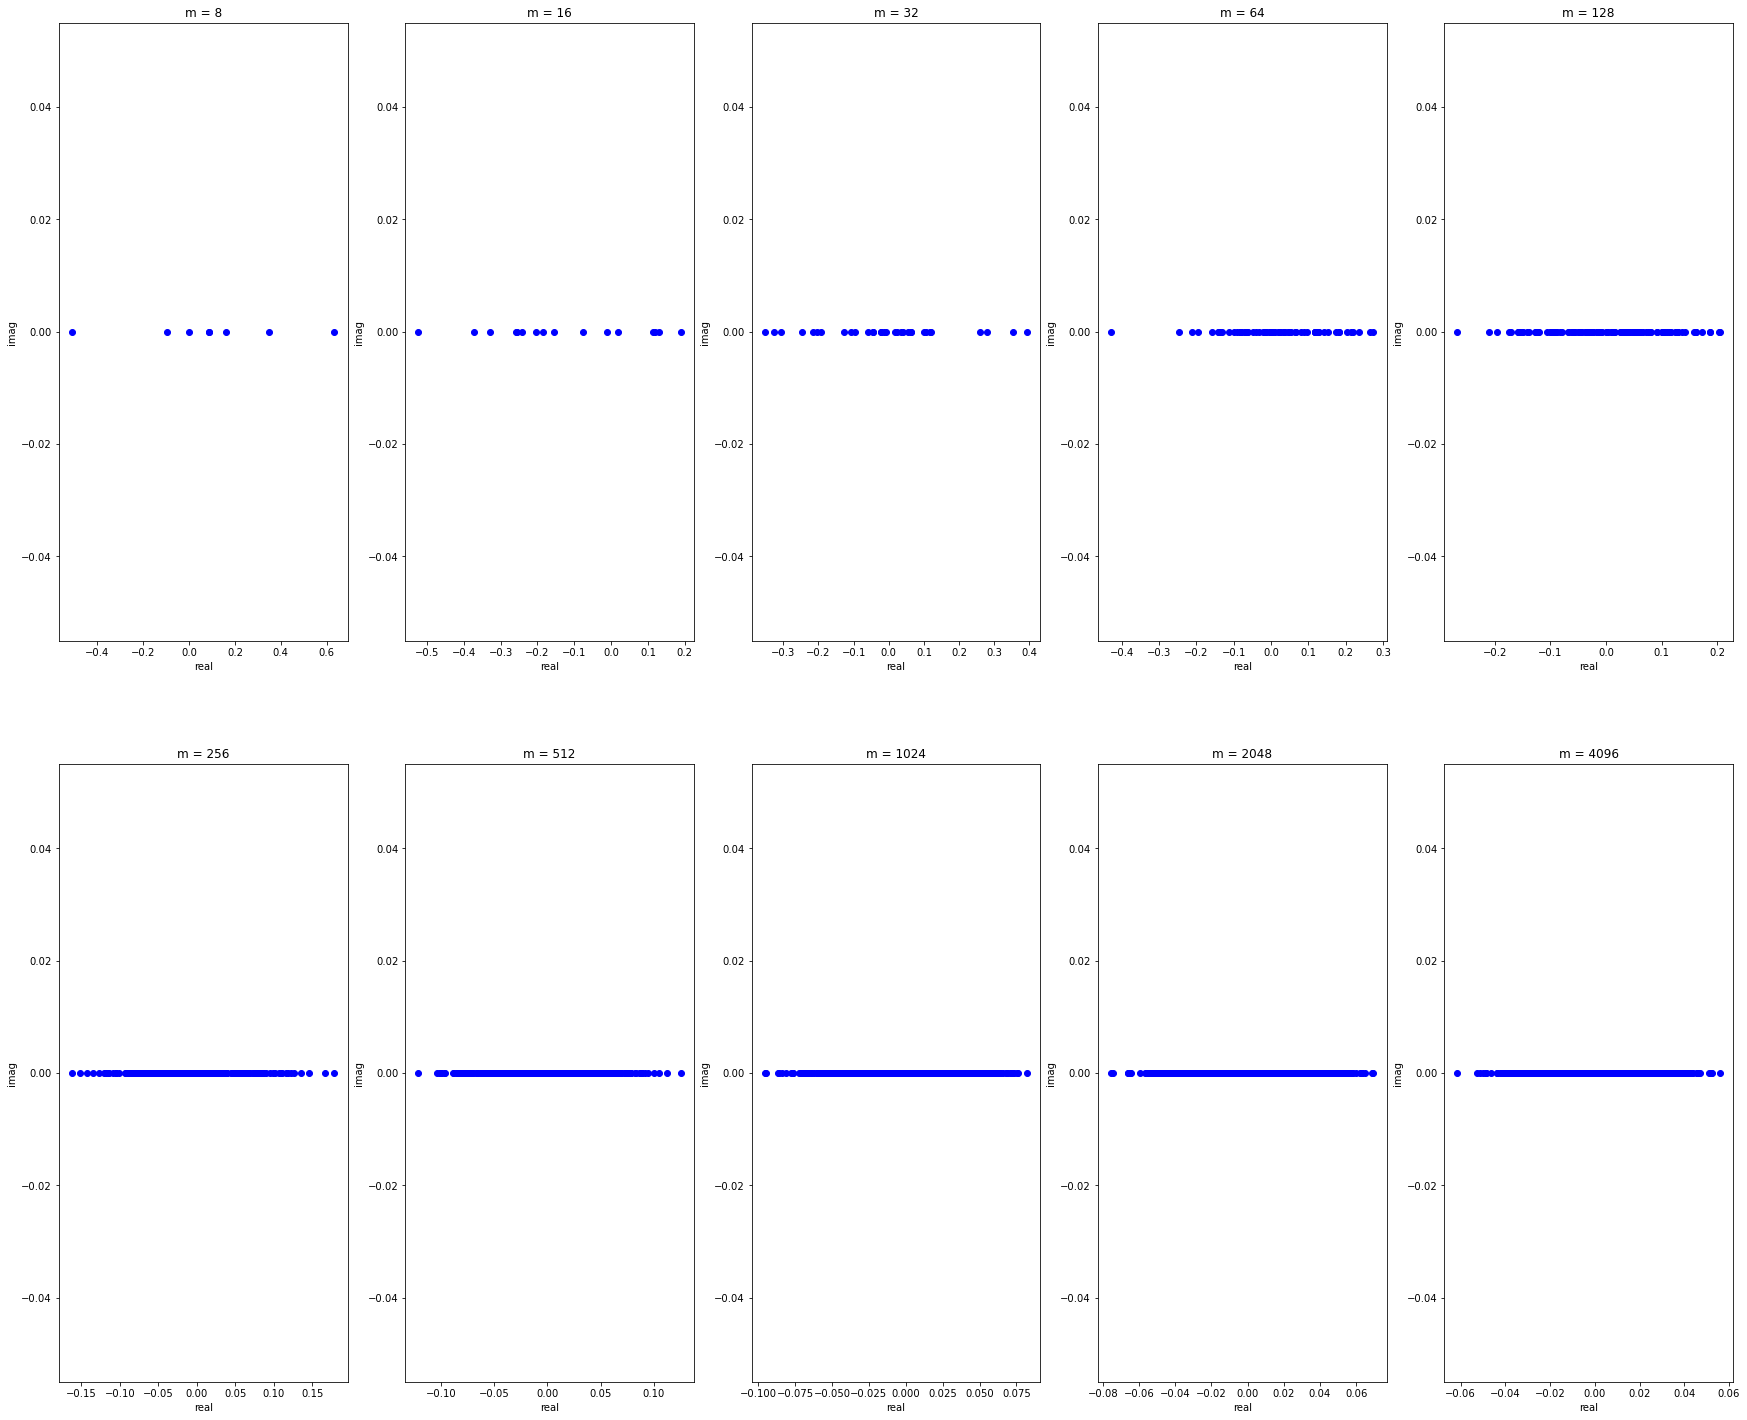

In [550]:
plt.figure(figsize=(30,25))

for i in range(10):
   
    plt.subplot(2,5,i+1)
    m = 2**(i+3)
    title = 'm = '+str(m)
    A = np.triu(np.random.randn(m,m)/np.sqrt(m))
    e = np.linalg.eigvals(A)
    plt.scatter(np.real(e),np.imag(e), c ='b')
    plt.xlabel('real')
    plt.ylabel('imag')
    plt.title(title)

### spectral radius of upper triangular matrix

Text(0.5, 1.0, 'behavior of spectral radius of upper triangular matrix')

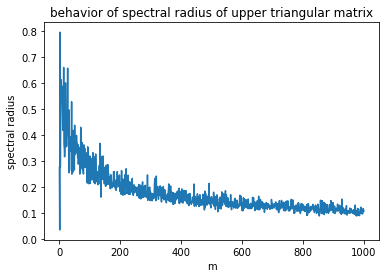

In [552]:
q = [0]*1000
    
for m in range(1,1001):
    A = np.triu(np.random.randn(m,m)/np.sqrt(m))
    e = np.linalg.eigvals(A)
    q[m-1] = max(abs(e))
    
plt.plot([i for i in range(1,1001)],q)
plt.xlabel('m')
plt.ylabel('spectral radius')
plt.title('behavior of spectral radius of upper triangular matrix')

'seems like spectral radius converges towards 0'

### norm of random upper triangular matrix

Text(0.5, 1.0, 'difference between matrix norm and spectral radius for upper triangular matrices')

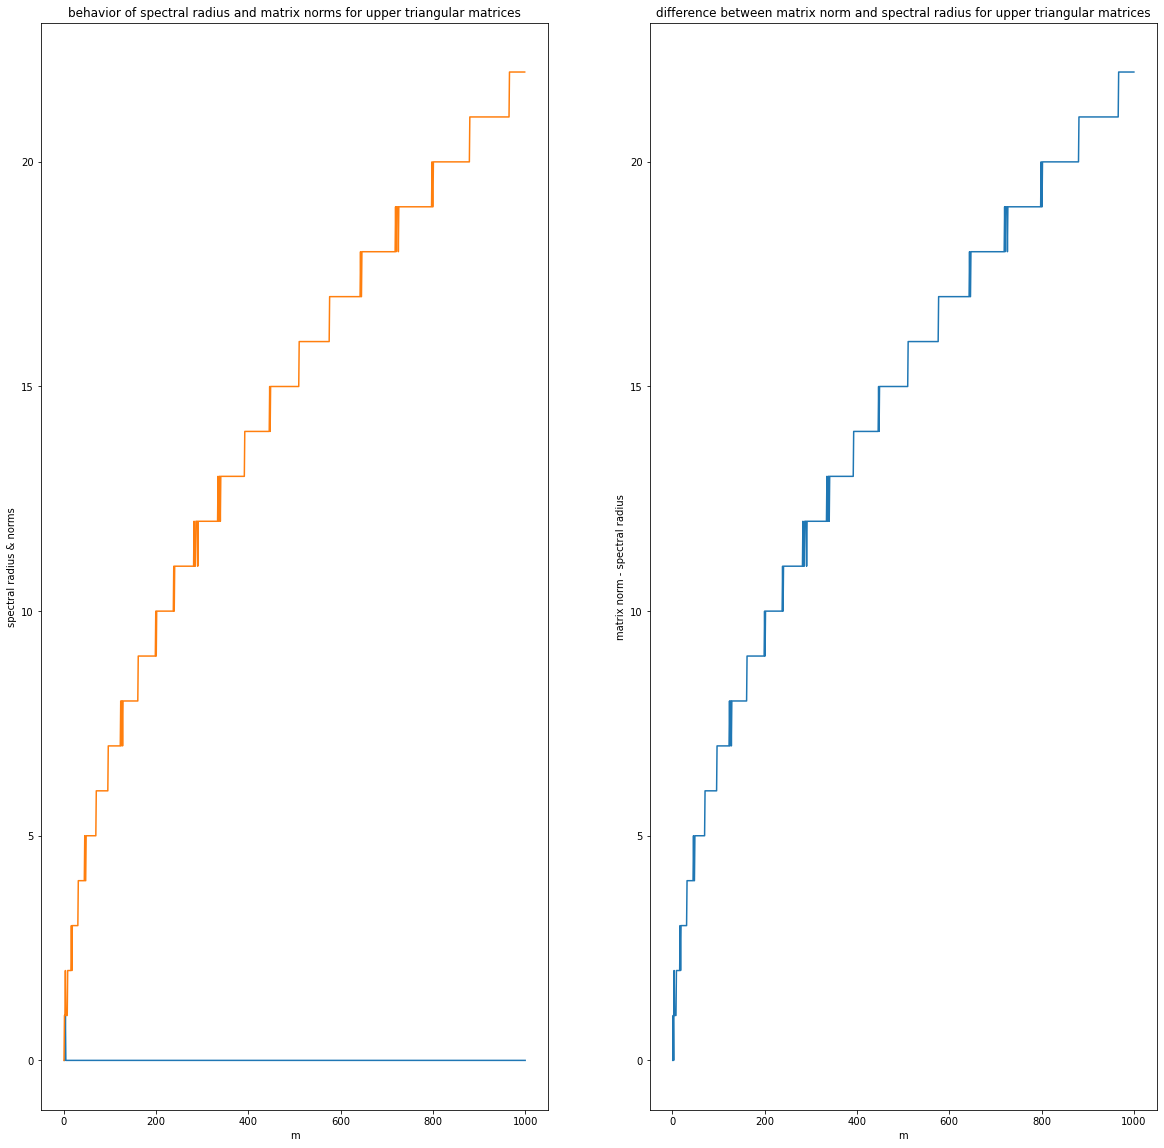

In [553]:
plt.figure(figsize=(20,20))
norms = np.array([0]*1000)
spectrals = np.array([0]*1000)
for m in range(1,1001):
    A = np.triu(np.random.randn(m,m)/np.sqrt(m))
    e = np.linalg.eigvals(A)
    spectrals[m-1] = max(abs(e))
    norms[m-1] = np.linalg.norm(A)

plt.subplot(1,2,1)
plt.plot([i for i in range(1,1001)],spectrals,norms)
plt.xlabel('m')
plt.ylabel('spectral radius & norms')
plt.title('behavior of spectral radius and matrix norms for upper triangular matrices')

plt.subplot(1,2,2)
plt.plot([i for i in range(1,1001)],norms-spectrals)
plt.xlabel('m')
plt.ylabel('matrix norm - spectral radius')
plt.title('difference between matrix norm and spectral radius for upper triangular matrices')

### condition numbers & minimum singular values of upper triangular matrix

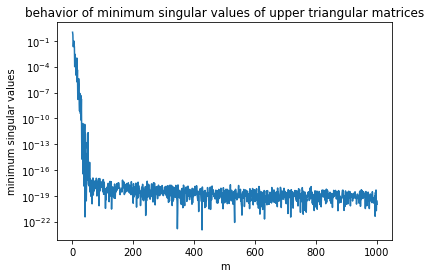

In [554]:
minsvs = [0]*1000
for m in range(1,1001):
    A = np.triu(np.random.randn(m,m)/np.sqrt(m))
    minsvs[m-1] = 1/np.linalg.cond(A)
    
plt.plot([i for i in range(1,1001)],minsvs)
plt.xlabel('m')
plt.ylabel('minimum singular values')
plt.title('behavior of minimum singular values of upper triangular matrices')
plt.yscale('log')

# 4-6

## settings

In [684]:
m = 50
n = 12
t = np.linspace(0,1,m)
A = np.vander(t,n)
A = np.fliplr(A)
b = np.cos(4*t)

## 4-6 a) Formation and solution of normal equations, using Python's

In [685]:
x = sp.linalg.lstsq(A,b)
xa = x[0]
print(xa)

[ 1.00000000e+00 -4.22742747e-07 -7.99998124e+00 -3.18763179e-04
  1.06694308e+01 -1.38202867e-02 -5.64707563e+00 -7.53160186e-02
  1.69360696e+00  6.03211341e-03 -3.74241705e-01  8.80405764e-02]


## 4-6 b) QR factorization computed by mgs

In [686]:
[Qb, Rb] = mgs(A)
xb = np.linalg.solve(Rb,np.dot(Qb.T,b))
print(xb)

[ 1.00000000e+00 -7.80741851e-07 -7.99996781e+00 -5.16377008e-04
  1.06709431e+01 -2.06445282e-02 -5.62772565e+00 -1.10758970e-01
  1.73549472e+00 -2.48104577e-02 -3.61374792e-01  8.57179143e-02]


## 4-6 c) QR factorization computed by qrhouse

In [687]:
[V, Rc] = qrhouse(A)
Qc = formQ(V)
xc = np.linalg.solve(Rc,np.dot(Qc.T,b))
print(xc)

[ 1.00000000e+00 -4.22743049e-07 -7.99998124e+00 -3.18763239e-04
  1.06694308e+01 -1.38202883e-02 -5.64707563e+00 -7.53160257e-02
  1.69360697e+00  6.03210744e-03 -3.74241703e-01  8.80405760e-02]


## 4-6 d) QR facorization computed by Python's qr

In [688]:
[Qd, Rd] = np.linalg.qr(A)
xd = np.linalg.solve(Rd,np.dot(Qd.T,b))
print(xd)

[ 1.00000000e+00 -4.22742762e-07 -7.99998124e+00 -3.18763193e-04
  1.06694308e+01 -1.38202872e-02 -5.64707563e+00 -7.53160213e-02
  1.69360696e+00  6.03211095e-03 -3.74241704e-01  8.80405762e-02]


## 4-6 f) SVD using Python's svd

In [689]:
U, s, V = np.linalg.svd(A)
Sinv = np.zeros((n,m))
np.fill_diagonal(Sinv,[1/i for i in s])
Apseudo = np.matmul(V.T,np.matmul(Sinv,U.T))
xf = np.dot(Apseudo,b)
print(xf)

[ 1.00000000e+00 -4.22742787e-07 -7.99998124e+00 -3.18763205e-04
  1.06694308e+01 -1.38202875e-02 -5.64707563e+00 -7.53160222e-02
  1.69360696e+00  6.03211124e-03 -3.74241705e-01  8.80405762e-02]


## 4-6 g) differences between each lists of coefficients

In [690]:
print("xa")
print(xa)
print("xb")
print(xb)
print("xc")
print(xc)
print("xd")
print(xd)
print("xf")
print(xf)

xa
[ 1.00000000e+00 -4.22742747e-07 -7.99998124e+00 -3.18763179e-04
  1.06694308e+01 -1.38202867e-02 -5.64707563e+00 -7.53160186e-02
  1.69360696e+00  6.03211341e-03 -3.74241705e-01  8.80405764e-02]
xb
[ 1.00000000e+00 -7.80741851e-07 -7.99996781e+00 -5.16377008e-04
  1.06709431e+01 -2.06445282e-02 -5.62772565e+00 -1.10758970e-01
  1.73549472e+00 -2.48104577e-02 -3.61374792e-01  8.57179143e-02]
xc
[ 1.00000000e+00 -4.22743049e-07 -7.99998124e+00 -3.18763239e-04
  1.06694308e+01 -1.38202883e-02 -5.64707563e+00 -7.53160257e-02
  1.69360697e+00  6.03210744e-03 -3.74241703e-01  8.80405760e-02]
xd
[ 1.00000000e+00 -4.22742762e-07 -7.99998124e+00 -3.18763193e-04
  1.06694308e+01 -1.38202872e-02 -5.64707563e+00 -7.53160213e-02
  1.69360696e+00  6.03211095e-03 -3.74241704e-01  8.80405762e-02]
xf
[ 1.00000000e+00 -4.22742787e-07 -7.99998124e+00 -3.18763205e-04
  1.06694308e+01 -1.38202875e-02 -5.64707563e+00 -7.53160222e-02
  1.69360696e+00  6.03211124e-03 -3.74241705e-01  8.80405762e-02]


xa  
 1.00000000e+00, -4.227427<span style="color:red">~~47~~</span>e-07, -7.99998124e+00, -3.187631<span style="color:red">~~79~~</span>e-04,  
 1.06694308e+01, -1.382028<span style="color:red">~~67~~</span>e-02, -5.64707563e+00, -7.53160<span style="color:red">~~186~~</span>e-02,  
 1.69360696e+00, 6.03211<span style="color:red">~~341~~</span>e-03,  -3.74241705e-01,  8.8040576<span style="color:red">~~4~~</span>e-02
  
xb  

1.00000000e+00, -<span style="color:red">~~7.80741851~~</span>e-07, -7.9999<span style="color:red">~~6781~~</span>e+00, -<span style="color:red">~~5.16377008~~</span>e-04,  
1.06<span style="color:red">~~709431~~</span>e+01, -<span style="color:red">~~2.06445282~~</span>e-02, -5.6<span style="color:red">~~2772565~~</span>e+00, -<span style="color:red">~~1.10758970~~</span>e-01,   
1.<span style="color:red">~~73549472~~</span>e+00, -<span style="color:red">~~2.48104577~~</span>e-02, -3.<span style="color:red">~~61374792~~</span>e-01,  8.<span style="color:red">~~57179143~~</span>e-02
  
xc  

1.00000000e+00, -4.2274<span style="color:red">~~3049~~</span>e-07, -7.99998124e+00, -3.18763<span style="color:red">~~239~~</span>e-04,  
1.06694308e+01, -1.382028<span style="color:red">~~83~~</span>e-02, -5.64707563e+00, -7.53160<span style="color:red">~~257~~</span>e-02,  
1.6936069<span style="color:red">~~7~~</span>e+00,  6.0321<span style="color:red">~~0744~~</span>e-03, -3.7424170<span style="color:red">~~3~~</span>e-01,  8.8040576<span style="color:red">~~0~~</span>e-02
  
xd    

1.00000000e+00, -4.227427<span style="color:red">~~62~~</span>e-07, -7.99998124e+00, -3.187631<span style="color:red">~~93~~</span>e-04,  
1.06694308e+01, -1.382028<span style="color:red">~~72~~</span>e-02, -5.64707563e+00, -7.53160<span style="color:red">~~213~~</span>e-02,  
1.69360696e+00,  6.03211<span style="color:red">~~095~~</span>e-03, -3.7424170<span style="color:red">~~4~~</span>e-01,  8.80405762e-02
  
xf  

1.00000000e+00, -4.227427<span style="color:red">~~87~~</span>e-07, -7.99998124e+00, -3.18763<span style="color:red">~~205~~</span>e-04,  
1.06694308e+01, -1.382028<span style="color:red">~~75~~</span>e-02, -5.64707563e+00, -7.53160<span style="color:red">~~222~~</span>e-02,  
1.69360696e+00,  6.03211<span style="color:red">~~124~~</span>e-03, -3.74241705e-01,  8.80405762e-02

- mgs seems instable
- other methods seems consistent to each other